In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from PIL import Image
from IPython.display import display

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

/kaggle/input
/kaggle/input/ukraine-ml-bootcamp-2023
/kaggle/input/ukraine-ml-bootcamp-2023/images
/kaggle/input/ukraine-ml-bootcamp-2023/images/train_images
/kaggle/input/ukraine-ml-bootcamp-2023/images/test_images


**Data**

In [2]:
project_path = '/kaggle/input/ukraine-ml-bootcamp-2023/'
url_train = '/kaggle/input/ukraine-ml-bootcamp-2023/train.csv'
url_test = '/kaggle/input/ukraine-ml-bootcamp-2023/test.csv'
url_base = '/kaggle/input/ukraine-ml-bootcamp-2023/images/train_images/'

df = pd.read_csv(url_train)
# image size
#df['image_size'] = df['image_id'].apply(lambda x: Image.open(url_base+x).size)
df

image_id  class_6
0     1daf45401342ac321c0aa5668f51d004.jpg        5
1     7e15c14f0b25766d0b7378f1d5328e99.jpg        4
2     1dc97053cf67cb8e51c983abb0021083.jpg        4
3     0ceaf686d3b9c1db537fed12b568670d.jpg        1
4     73adbf71f0adcf89c94339f6a6a92b61.jpg        0
...                                    ...      ...
2355  3cb75d7569544a8be6850893dc939ed6.jpg        4
2356  fa14b6703b1eda25b4a851c163a1efc2.jpg        5
2357  e58ee6afa09efc6021e8b56a9bda6960.jpg        0
2358  94c16216e9674ec1a254c73d56d2ebe1.jpg        2
2359  14f01dc9d70c9790e71bc1ca7afbbf66.jpg        2

[2360 rows x 2 columns]

Classes Distribution

<Axes: title={'center': 'Classes distribution'}>

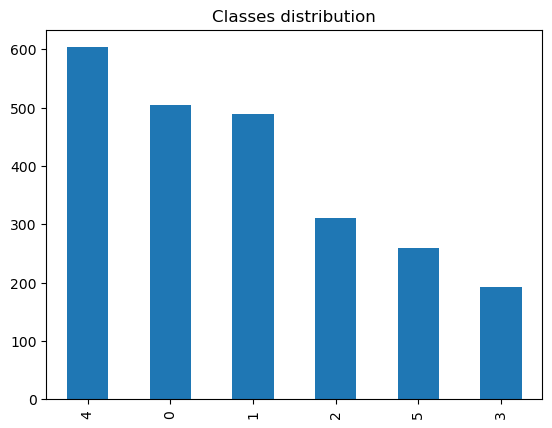

In [3]:
df['class_6'].value_counts().plot(kind='bar', title='Classes distribution')

Random Images from Dataset

In [4]:
number_random_images = 4
df_class = df.groupby('class_6')['image_id'].apply(set).reset_index()
df_class['num'] = df_class['image_id'].apply(len)
df_class['image_random'] = df_class['image_id'].apply(lambda x: random.sample(x, number_random_images))
df_class

/tmp/ipykernel_22/1708679663.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  df_class['image_random'] = df_class['image_id'].apply(lambda x: random.sample(x, number_random_images))


class_6                                           image_id  num  \
0        0  {a0d511e7864da8dc5c232b8fbdd9c106.jpg, 916ba1f...  505   
1        1  {4407a7178a0546fd24dbfce16578d2cf.jpg, dfc8f35...  489   
2        2  {28da66085e48af8997d017e7de60c292.jpg, 2ac191d...  310   
3        3  {eb1ca1e0540da9e3c58735a2ca58c885.jpg, b0f495a...  193   
4        4  {b1f32323d290fdf026bb19d6776fdff4.jpg, b1b8a74...  603   
5        5  {8e088243586ca5318ab22e73d4059c52.jpg, a955767...  260   

                                        image_random  
0  [226f405129d56da5ed1e38fbf5bf3c15.jpg, 0cb2987...  
1  [8cec5dcc684cadea9f21fcaeeaed5d15.jpg, bd4b4e0...  
2  [408dc6fa17b60e2dc62f9cf929834c78.jpg, d664e89...  
3  [b4910d25e9c96fca74bb68cdfad71a0a.jpg, 7234dc6...  
4  [fe8a9c209d08e138c5ed6cab4ef0b09e.jpg, 19d5046...  
5  [e12afca24971af5d62292bd8b4160946.jpg, 47bcec6...

In [5]:
def show_grid(img_list, img_class):
    fig = plt.figure(figsize=(16., 16.))
    grid = ImageGrid(fig, 111, nrows_ncols=(2, 2), axes_pad=0.2)

    for ax, img in zip(grid, img_list):
        ax.imshow(Image.open(url_base+img))
        ax.set_title(img)

    fig.suptitle('Class # {}'.format(img_class), fontsize=28, y=.925)
    plt.show()
    
# show_grid(df_class['image_random'].iloc[0], 0)

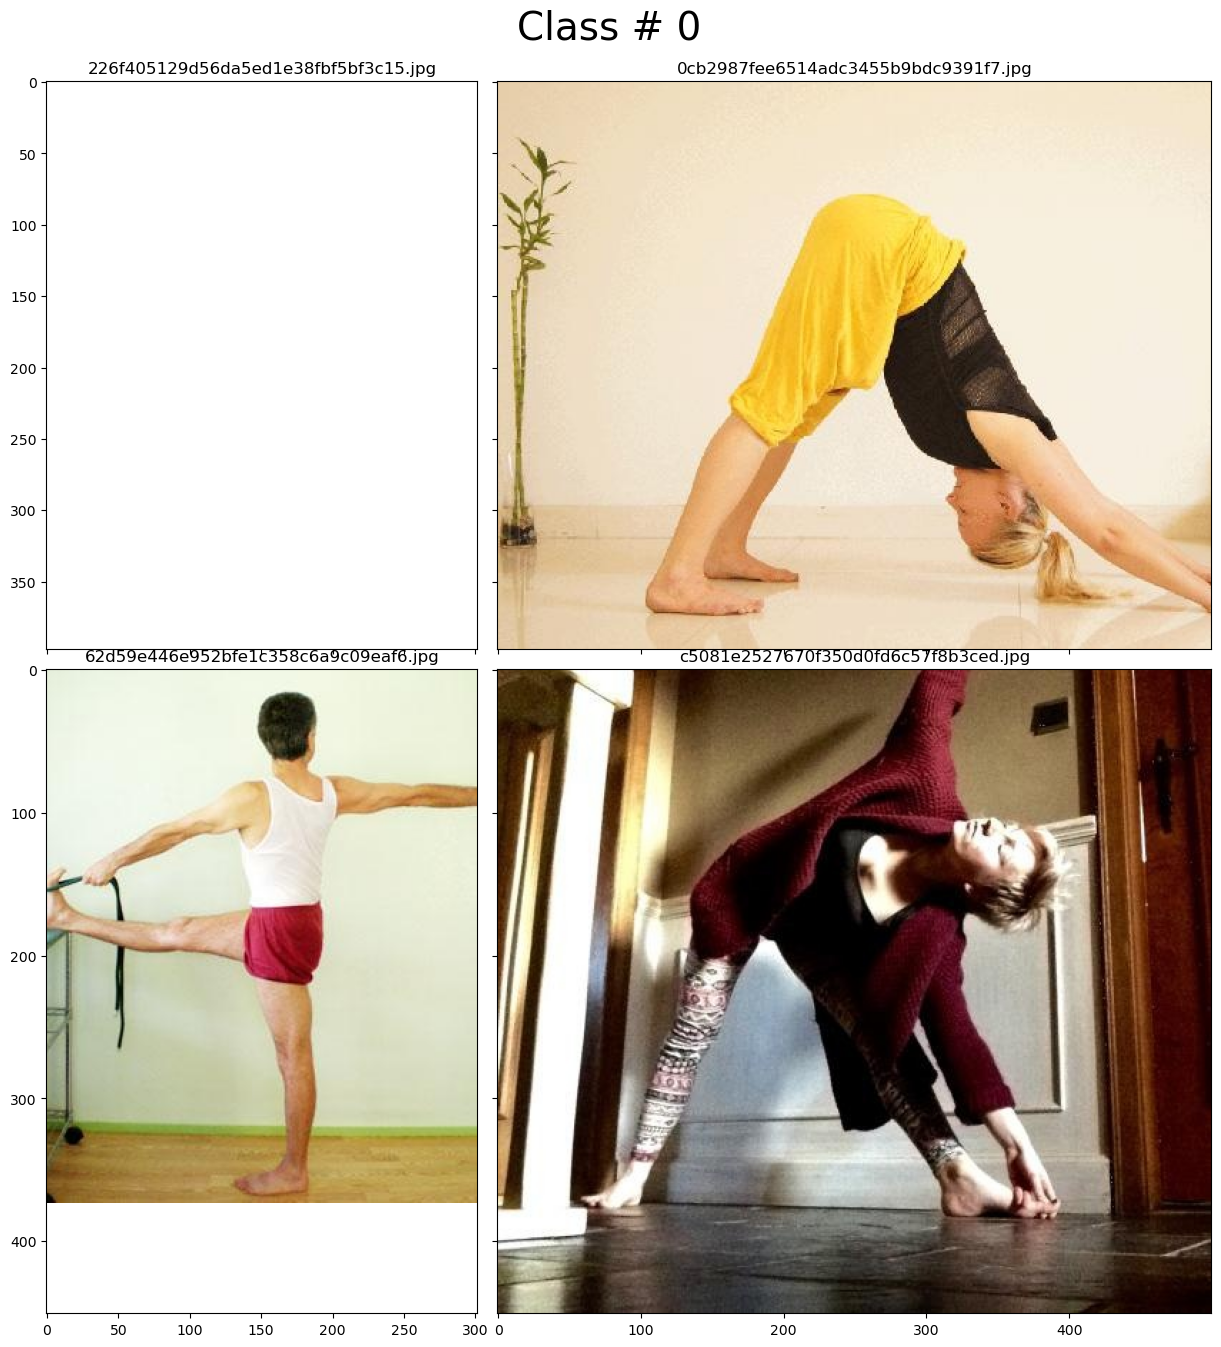

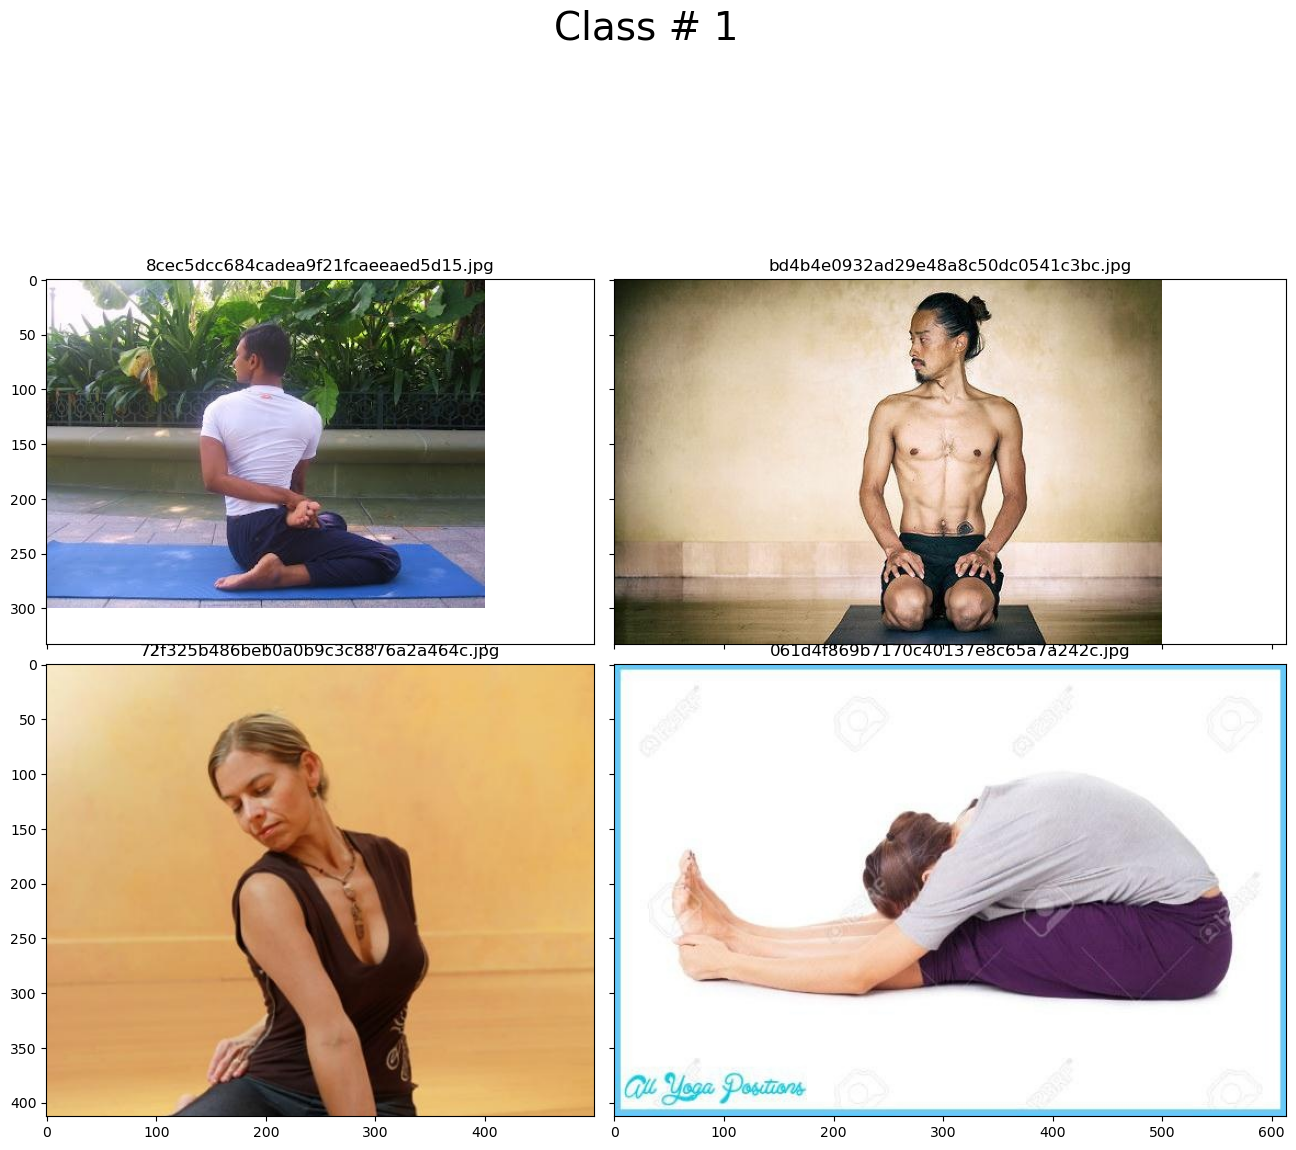

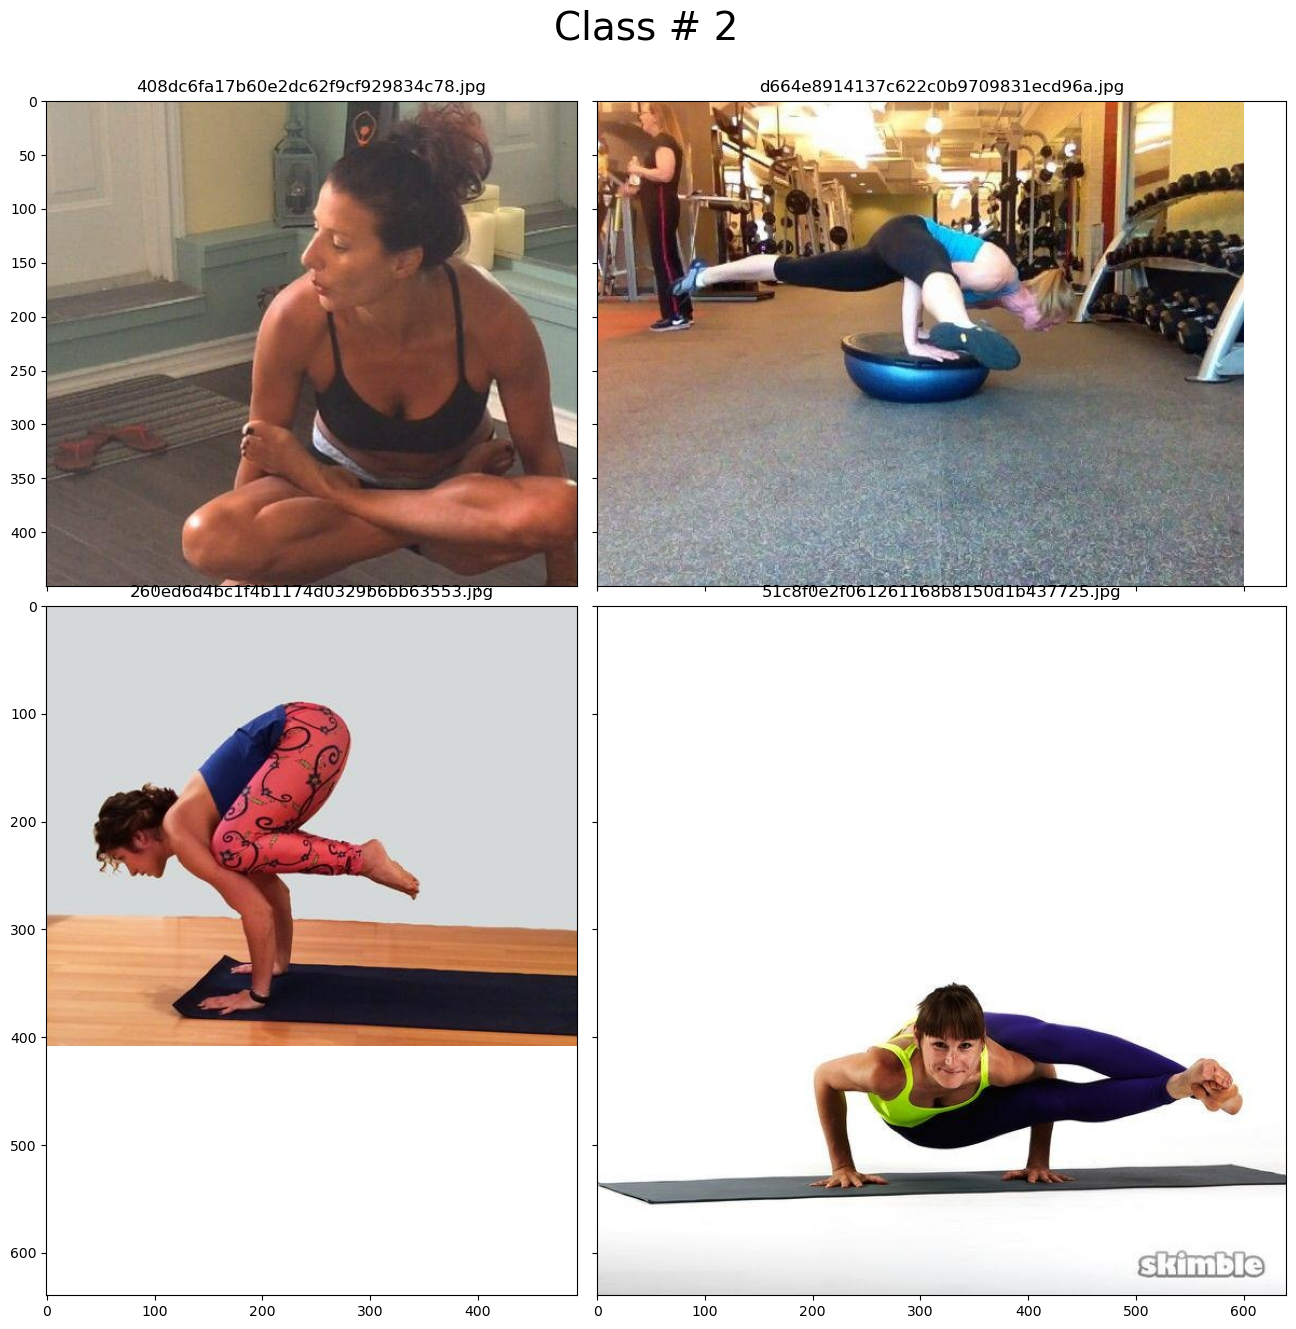

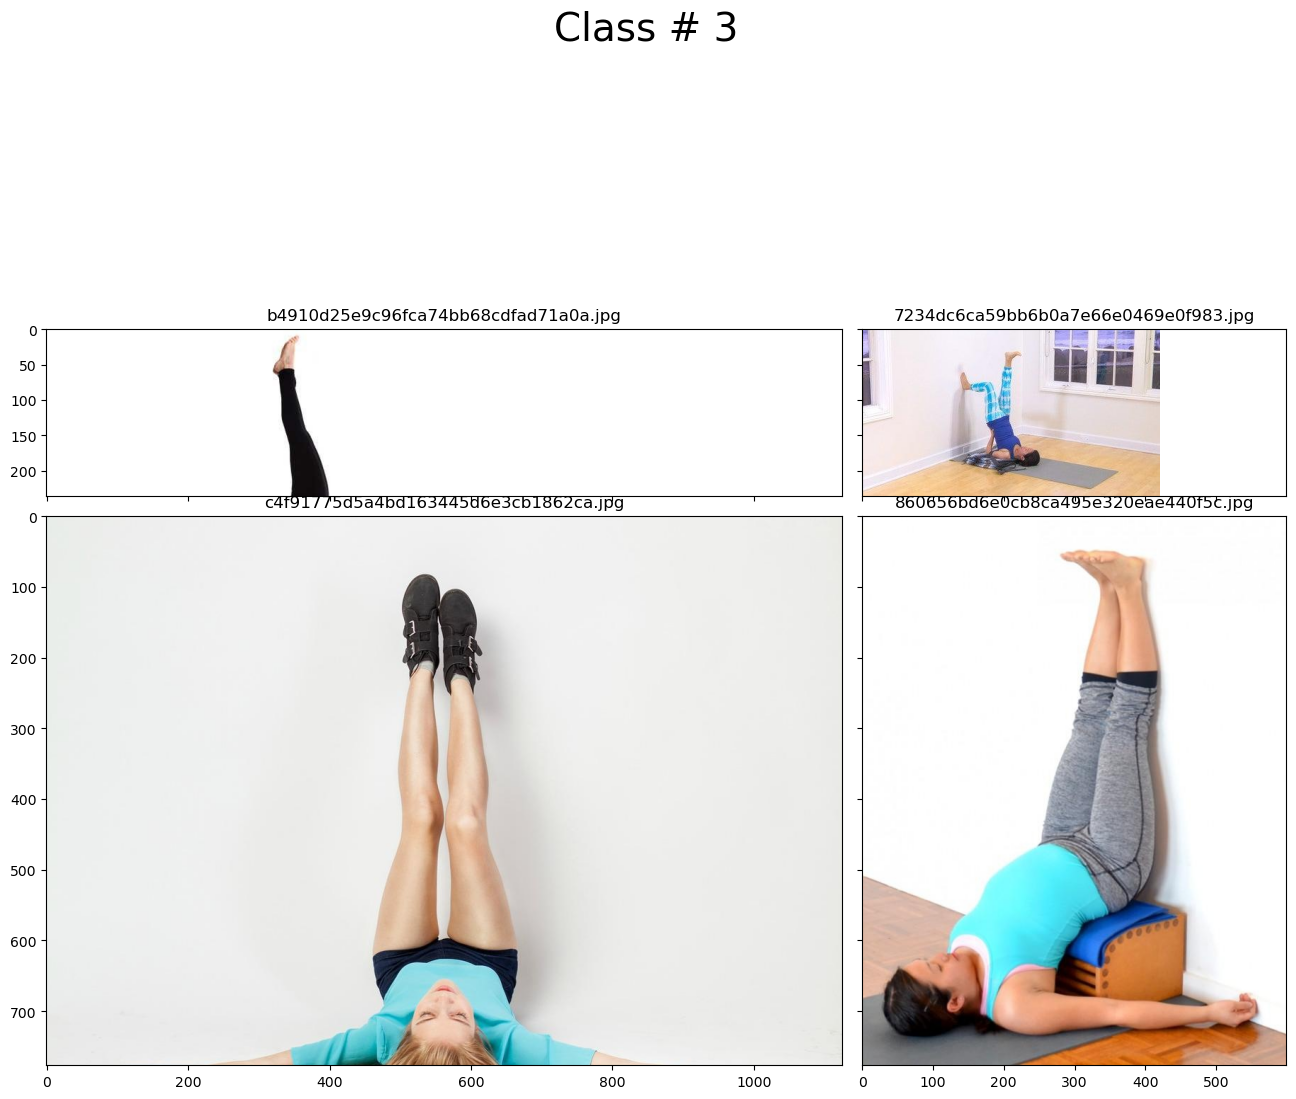

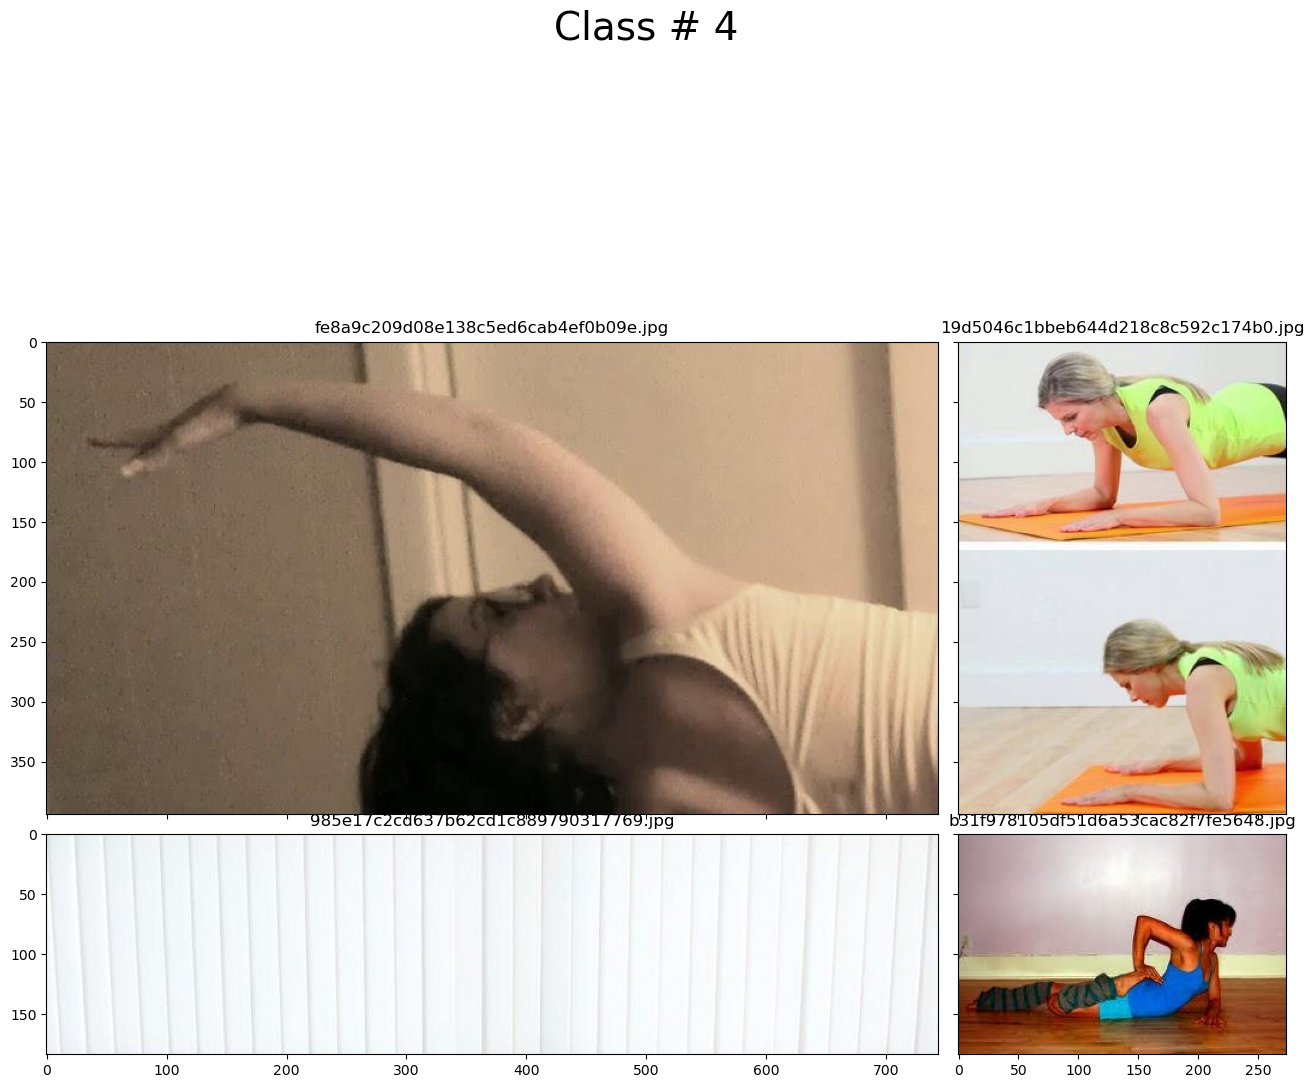

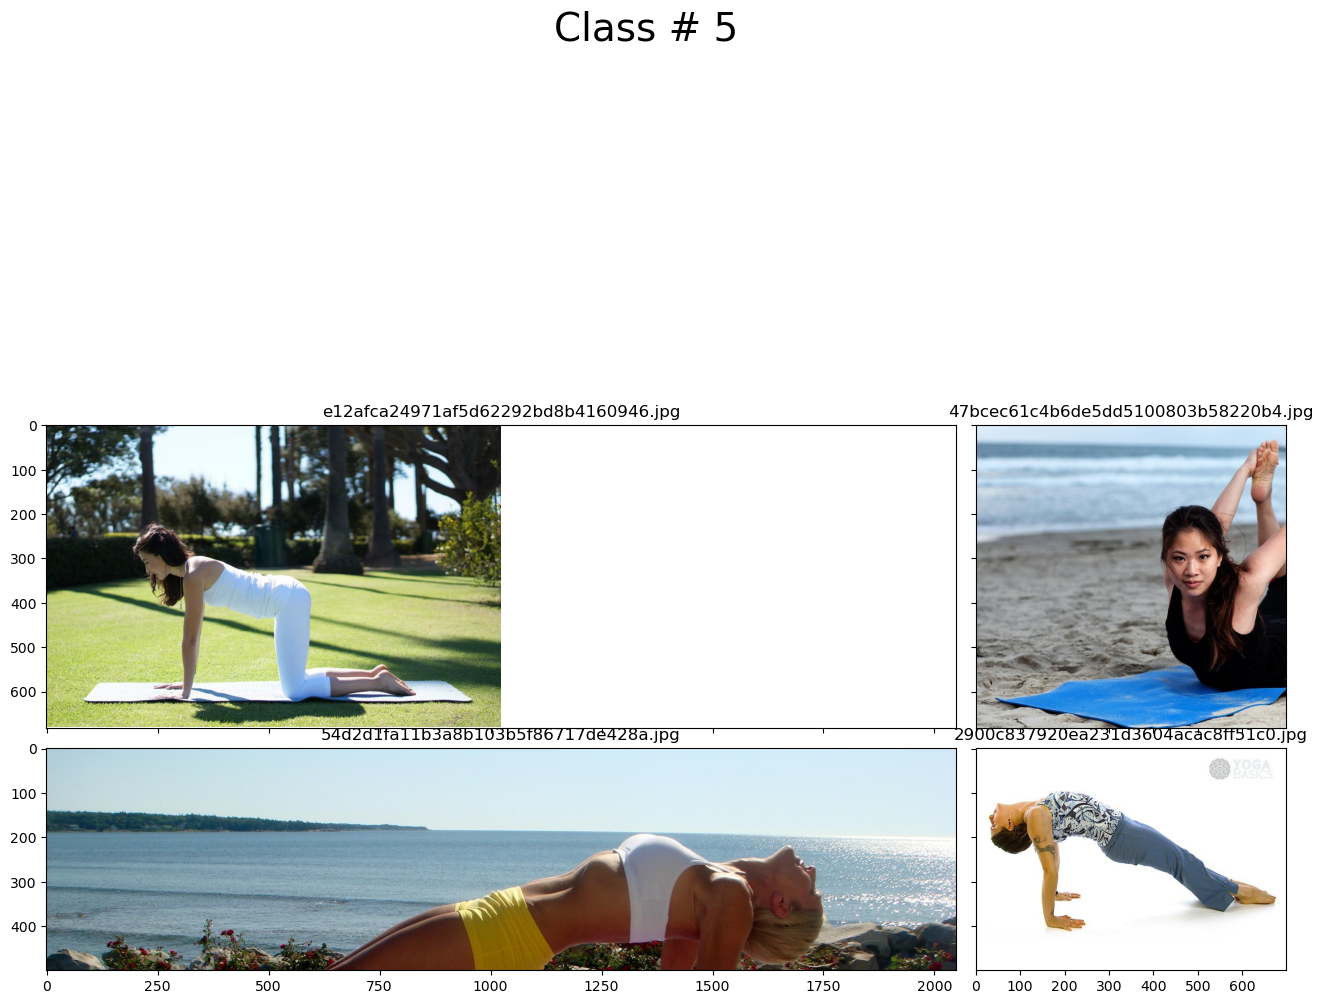

In [6]:
for i, row in df_class.iterrows():
    show_grid(row['image_random'], row['class_6'])
    print()

In [7]:
train_datagen = ImageDataGenerator(
    rotation_range=20,      # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # Randomly shift images vertically (fraction of total height)
    shear_range=0.2,        # Randomly apply shear transformations
    zoom_range=0.2,         # Randomly zoom inside pictures
    fill_mode='nearest',    # The strategy used for filling in newly created pixels
    rescale=1./255,         # Rescale image values to [0,1]
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

if tf.test.is_gpu_available():
    print("TensorFlow can use the GPU!")
    print("GPU Name:", tf.test.gpu_device_name())
else:
    print("TensorFlow cannot use the GPU.")

Num GPUs Available:  1
TensorFlow can use the GPU!
GPU Name: /device:GPU:0


In [9]:
# Directory path 
#url_base = '/kaggle/input/ukraine-ml-bootcamp-2023/images/train_images/'
df['class_6'] = df['class_6'].astype(str)

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)


# Train generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=url_base,
    x_col='image_id',
    y_col='class_6',
    batch_size=32,
    shuffle=True,
    class_mode='categorical',  # Since class_6 is an integer label (0 to 5)
    target_size=(150, 150)  # Adjust the target size to the size of your input images
)

# Validation generator
val_generator = validation_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=url_base,
    x_col='image_id',
    y_col='class_6',
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    # color_mode='grayscale',
    target_size=(150, 150)
)

Found 1888 validated image filenames belonging to 6 classes.
Found 472 validated image filenames belonging to 6 classes.


{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


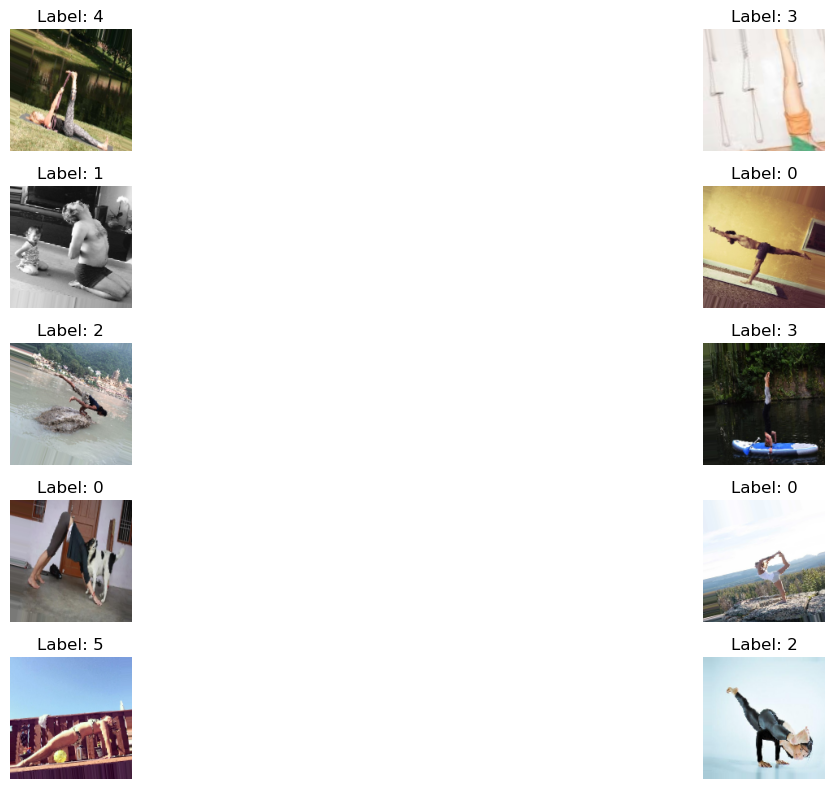

In [10]:
print(train_generator.class_indices)
num_images = 10
images_batch, labels_batch = next(train_generator)
# Set the number of rows and columns for your grid
num_rows = 5
num_cols = 2

# Increase the figure size for larger images
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 8)) 

batch_start_idx = train_generator.batch_index * train_generator.batch_size

for i in range(num_images):
    row_idx = i // num_cols  # Integer division to get row index
    col_idx = i % num_cols  # Remainder to get column index
    
    ax = axes[row_idx, col_idx]

    # Get image, label, and filename
    image = images_batch[i]
    label = labels_batch[i]
    # Display the image and its label
    ax.imshow(image)
    ax.set_title(f"Label: {np.argmax(label)}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [11]:
def micro_f1_score(y_true, y_pred):
    # Convert predictions to one-hot vectors
    y_pred = K.one_hot(K.argmax(y_pred), num_classes=6)

    # Calculate true positives, false positives, and false negatives over all classes
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    # Micro-average precision and recall
    micro_precision = K.sum(tp) / (K.sum(tp + fp) + K.epsilon())
    micro_recall = K.sum(tp) / (K.sum(tp + fn) + K.epsilon())

    # Calculate micro-averaged F1-score
    micro_f1 = 2 * micro_precision * micro_recall / (micro_precision + micro_recall + K.epsilon())

    return micro_f1

In [12]:
model = Sequential()

# сonvolution layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

# Flatten and use fully connected layers
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(6, activation='softmax'))  # 6 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[micro_f1_score, 'accuracy'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [13]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
59/59 [==============================] - 49s 669ms/step - loss: 1.7380 - micro_f1_score: 0.2362 - accuracy: 0.2362 - val_loss: 2.1100 - val_micro_f1_score: 0.2646 - val_accuracy: 0.2627
Epoch 2/10
59/59 [==============================] - 23s 390ms/step - loss: 1.7272 - micro_f1_score: 0.2489 - accuracy: 0.2489 - val_loss: 2.6118 - val_micro_f1_score: 0.2444 - val_accuracy: 0.2436
Epoch 3/10
59/59 [==============================] - 24s 402ms/step - loss: 1.7160 - micro_f1_score: 0.2680 - accuracy: 0.2680 - val_loss: 2.1374 - val_micro_f1_score: 0.2778 - val_accuracy: 0.2775
Epoch 4/10
59/59 [==============================] - 22s 380ms/step - loss: 1.6819 - micro_f1_score: 0.3125 - accuracy: 0.3125 - val_loss: 2.0979 - val_micro_f1_score: 0.3271 - val_accuracy: 0.3263
Epoch 5/10
59/59 [==============================] - 23s 396ms/step - loss: 1.6545 - micro_f1_score: 0.3151 - accuracy: 0.3151 - val_loss: 2.7868 - val_micro_f1_score: 0.3417 - val_accuracy: 0.3432
Epoch 6/10
59/5

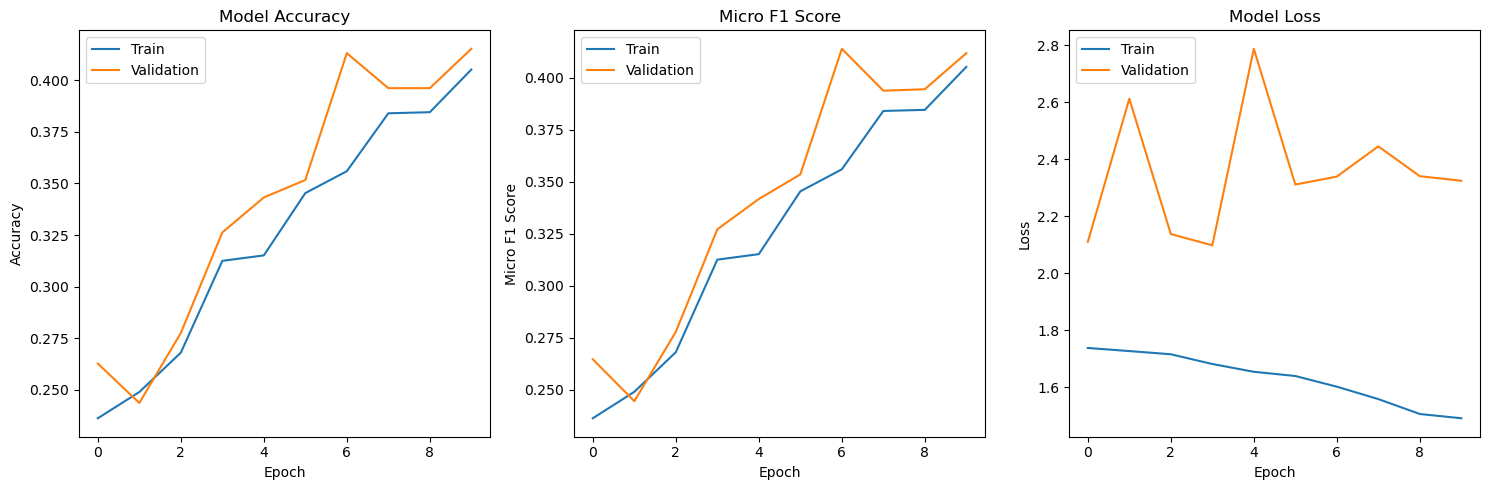

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy, F1 score, and loss values
plt.figure(figsize=(15, 5))

# Plotting Accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting Micro F1 Score
plt.subplot(1, 3, 2)
plt.plot(history.history['micro_f1_score'])
plt.plot(history.history['val_micro_f1_score'])
plt.title('Micro F1 Score')
plt.ylabel('Micro F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting Loss
plt.subplot(1, 3, 3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [15]:
all_data_gen = ImageDataGenerator(
    rotation_range=20,      # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # Randomly shift images vertically (fraction of total height)
    shear_range=0.2,        # Randomly apply shear transformations
    zoom_range=0.2,         # Randomly zoom inside pictures
    fill_mode='nearest',    # The strategy used for filling in newly created pixels
    rescale=1./255,         # Rescale image values to [0,1]
)
all_data_generator = all_data_gen.flow_from_dataframe(
    dataframe=df,
    directory=url_base,
    x_col='image_id',
    y_col='class_6',
    batch_size=32,
    shuffle=True,
    class_mode='categorical',  # Use 'categorical' for one-hot encoded labels
    target_size=(150, 150)     # Adjust the target size to the size of your input images
)

Found 2360 validated image filenames belonging to 6 classes.


In [16]:
model = Sequential()

# convolution layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

# Flatten and use fully connected layers
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(6, activation='softmax'))  # 6 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[micro_f1_score, 'accuracy'])

# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# Define callbacks
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_accuracy', mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)


history_all_data = model.fit(
    all_data_generator,
    epochs=40,
    steps_per_epoch=len(all_data_generator),
    callbacks=[model_checkpoint, early_stopping]
)

Epoch 1/40
74/74 [==============================] - 28s 342ms/step - loss: 1.9322 - micro_f1_score: 0.2553 - accuracy: 0.2555
Epoch 2/40
74/74 [==============================] - 26s 346ms/step - loss: 2.1147 - micro_f1_score: 0.2404 - accuracy: 0.2407
Epoch 3/40
74/74 [==============================] - 25s 342ms/step - loss: 3.7000 - micro_f1_score: 0.2562 - accuracy: 0.2564
Epoch 4/40
74/74 [==============================] - 25s 343ms/step - loss: 4.4868 - micro_f1_score: 0.2275 - accuracy: 0.2280
Epoch 5/40
74/74 [==============================] - 25s 344ms/step - loss: 10.2920 - micro_f1_score: 0.2507 - accuracy: 0.2504
Epoch 6/40
74/74 [==============================] - 25s 336ms/step - loss: 10.7249 - micro_f1_score: 0.2506 - accuracy: 0.2508
Epoch 7/40
74/74 [==============================] - 25s 339ms/step - loss: 14.6596 - micro_f1_score: 0.2458 - accuracy: 0.2466
Epoch 8/40
74/74 [==============================] - 25s 339ms/step - loss: 5.6210 - micro_f1_score: 0.2611 - accura

In [18]:
test_images_dir = '/kaggle/input/ukraine-ml-bootcamp-2023/images/test_images/'
# List all the images in the test_images directory
image_filenames = os.listdir(test_images_dir)
df_test = pd.DataFrame({
    'filename': image_filenames,
    'dummy_col': [0] * len(image_filenames)  # This is a dummy column just to satisfy flow_from_dataframe
})

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=test_images_dir,
    x_col="filename",
    y_col="dummy_col",
    target_size=(150, 150),
    batch_size=1,
    class_mode=None,
    shuffle=False
)

Found 756 validated image filenames.


In [19]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

756/756 [==============================] - 9s 12ms/step


In [20]:
# Extract filenames from the generator
filenames = test_generator.filenames

# Create a DataFrame
df_predictions = pd.DataFrame({
    'image_id': filenames,
    'class_6': predicted_classes
})

# If 'image_id' contains path, extract only the filename
df_predictions['image_id'] = df_predictions['image_id'].apply(lambda x: x.split('/')[-1])
df_predictions

image_id  class_6
0    07620090bd3581a0c7c344750f18621b.jpg        0
1    277bdc60f20a49d73525ab24a6e2128a.jpg        0
2    798d7ed914181f0f61f1e84de6ae7bab.jpg        0
3    81def953c8ba1b3e084582f11972e135.jpg        0
4    772c257c9a37357eec811b923109fcb4.jpg        0
..                                    ...      ...
751  4ebf97acccead03c17d564c6701403ae.jpg        0
752  da154df9f315ce49a28d74df72c3631d.jpg        0
753  3018190bd40649434b22b57a537062f6.jpg        0
754  13189405493a419f4ad50d4066ded80b.jpg        0
755  4f87e07026ad190722dffbd18d9f73b2.jpg        0

[756 rows x 2 columns]

In [21]:
df_predictions.to_csv('submission.csv', index=False)

In [22]:
df_predictions.head(), df_predictions.tail()

(                               image_id  class_6
 0  07620090bd3581a0c7c344750f18621b.jpg        0
 1  277bdc60f20a49d73525ab24a6e2128a.jpg        0
 2  798d7ed914181f0f61f1e84de6ae7bab.jpg        0
 3  81def953c8ba1b3e084582f11972e135.jpg        0
 4  772c257c9a37357eec811b923109fcb4.jpg        0,
                                  image_id  class_6
 751  4ebf97acccead03c17d564c6701403ae.jpg        0
 752  da154df9f315ce49a28d74df72c3631d.jpg        0
 753  3018190bd40649434b22b57a537062f6.jpg        0
 754  13189405493a419f4ad50d4066ded80b.jpg        0
 755  4f87e07026ad190722dffbd18d9f73b2.jpg        0)